# Analisa Segmen Pelanggan

Product Manager yang bertanggung jawab terhadap pengalaman pengguna (*user experience*) dari toko daring Everything Plus meminta untuk Anda untuk menganalisa data yang akan digunakan untuk membuat tawaran khusus untuk pelanggan. Menurut product manager riset yang dilakukan secara kualitatif tidaklah cukup untuk membuat keputusan, mereka membutuhkan argumen berdasarkan data. Ini adalah riset baru. Product manager juga meminta untuk mendeskripsikan bagaimana solusi Anda dapat bekerja.

Data mencakup riwayat transaksi pelanggan dan seluruh periode yang tercakup pada sumber data akan digunakan untuk analisa Hasil analisa ini akan digunakan product manager untuk membuat tawaran khusus untuk pelanggan.

<b>Objektif:</b>
- Segmentasi pengguna berdasarkan riwayat transaksi pelanggan.

<b>Tahapan:</b><a id='back'></a>

1. [Ikhtisar Data](#Mulai)
2. [Pra-pemprosesan Data](#Pra-pemrosesan)
    - [Nama kolom](#1)
    - [Nilai duplikat](#2)
    - [Nilai yang hilang](#3)
    - [Tipe data](#4)
    - [Memeriksa kolom](#5)
    - [Memeriksa outlier](#6)
    - [Kolom tambahan](#7)
3. [*Exploratory Data Analysis*](#EDA)
    - [Metrik toko](#3_1)
    - [Segmen pengguna](#3_2)
4. [Menguji Hipotesis](#Test)
    - [Perbedaan statistik ukuran pesanan klaster 0 dan 2](#h1)
5. [Kesimpulan Umum](#Kesimpulan)
6. [Presentasi](#Presentasi)
7. [Dashboard](#Dashboard)

In [1]:
# Memuat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Pemisah dan skaler dataset 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Algoritme Unsupervised Machine Learning
from sklearn.cluster import KMeans

## Ikhtisar Data<a id='Mulai'></a>

In [2]:
# Memuat dataset
df = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\Final Project\\Part_4_Submission\\ecommerce_dataset_us.csv', sep='\t')

In [3]:
# Informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [4]:
# Ukuran dataset
df.shape

(541909, 7)

In [5]:
# Sampel data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [6]:
# Memeriksa nilai duplikat
df.duplicated().sum()

5268

In [7]:
# Memeriksa nilai yang hilang
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

Dokumentasi:
- `InvoiceNo` — pengenal pesanan

- `StockCode` — pengenal barang

- `Description` — nama barang

- `Quantity` — jumlah pesanan

- `InvoiceDate` — tanggal pesanan

- `UnitPrice` — harga per barang

- `CustomerID` — id pelanggan

**Kesimpulan sementara**

Terdapat beberapa hal yang bisa diperbaiki pada dataset:
1. Penaman kolom bisa dirubah menjadi *snake case*,
2. Nilai duplikat,
3. Nilai yang hilang pada kolom `CustomerID`, dan `Description`,
4. Tipe data pada kolom `InvoiceDate`, dan `CustomerID`

[Kembali ke tahapan](#back)

## Pra-pemprosesan Data<a id='Pra-pemrosesan'></a>

### Nama kolom<a id='1'></a>

In [8]:
# Nama kolom pada dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID'],
      dtype='object')

In [9]:
# Merubah nama kolom
df = df.rename(columns={
    'InvoiceNo':'invoice_no',
    'StockCode':'stock_code',
    'Description':'description',
    'Quantity':'quantity',
    'InvoiceDate':'invoice_date',
    'UnitPrice':'unit_price',
    'CustomerID':'customer_id'
})

In [10]:
# Memeriksa hasilnya
df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id'],
      dtype='object')

Nama-nama kolom sudah berhasil diperbaiki.

[Kembali ke tahapan](#back)

### Nilai duplikat<a id='2'></a>

In [11]:
# Memeriksa nilai duplikat
df.duplicated().sum()

5268

In [12]:
# Persentase nilai duplikat dibandingkan keseluruhan dataset
(df.duplicated().sum()/len(df))*100

0.9721189350979592

Karena persentasenya terbilang kecil jadi nilai duplikat bisa dihapus.

In [13]:
# Menghapus nilai duplikat
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
# Memeriksa hasilnya
df.duplicated().sum()

0

In [15]:
# Memeriksa persentase perubahan
100 - ((df.shape[0]/541909)*100)

0.9721189350979529

Nilai duplikat berhasil di perbaiki.

[Kembali ke tahapan](#back)

### Nilai yang hilang<a id='3'></a>

In [16]:
# Memeriksa nilai yang hilang
df.loc[df['customer_id'].isna()]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
605,536414,22139,NaN,56,11/29/2018 11:52,0.00,NaN
1407,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,11/29/2018 14:32,2.51,NaN
1408,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,11/29/2018 14:32,2.51,NaN
1409,536544,21786,POLKADOT RAIN HAT,4,11/29/2018 14:32,0.85,NaN
1410,536544,21787,RAIN PONCHO RETROSPOT,2,11/29/2018 14:32,1.66,NaN
...,...,...,...,...,...,...,...
536275,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/07/2019 10:26,4.13,NaN
536276,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/07/2019 10:26,4.13,NaN
536277,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/07/2019 10:26,4.96,NaN
536278,581498,85174,S/4 CACTI CANDLES,1,12/07/2019 10:26,10.79,NaN


In [17]:
# Persentase nilai yang hilang dibandingkan keseluruhan dataset
(df.isna().sum())/len(df)*100

invoice_no       0.000000
stock_code       0.000000
description      0.270945
quantity         0.000000
invoice_date     0.000000
unit_price       0.000000
customer_id     25.163377
dtype: float64

In [18]:
# Memeriksa keterkaitan nilai yang hilang pada kedua kolom
check_miss = df.loc[ (df['customer_id'].isna()) & (df['description'].isna())]

In [19]:
# Memeriksa hasilnya
check_miss.head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
605,536414,22139,NaN,56,11/29/2018 11:52,0.0,NaN
1934,536545,21134,NaN,1,11/29/2018 14:32,0.0,NaN
1935,536546,22145,NaN,1,11/29/2018 14:33,0.0,NaN
1936,536547,37509,NaN,1,11/29/2018 14:33,0.0,NaN
1951,536549,85226A,NaN,1,11/29/2018 14:34,0.0,NaN
1952,536550,85044,NaN,1,11/29/2018 14:34,0.0,NaN
1984,536552,20950,NaN,1,11/29/2018 14:34,0.0,NaN
1985,536553,37461,NaN,3,11/29/2018 14:35,0.0,NaN
1986,536554,84670,NaN,23,11/29/2018 14:35,0.0,NaN
2362,536589,21777,NaN,-10,11/29/2018 16:50,0.0,NaN


In [20]:
# Persentase dibandingkan dataset
(check_miss.shape[0]/len(df))*100

0.2709446352403189

In [21]:
# Memeriksa distribusi nilai yang hilang pada kolom `unit_price`
check_miss['unit_price'].value_counts()

0.0    1454
Name: unit_price, dtype: int64

In [22]:
# Distribusi nilai `unit_price` pada dataset
df['unit_price'].value_counts()

1.25      49750
1.65      37627
0.85      28182
2.95      27350
0.42      24277
          ...  
46.86         1
28.66         1
156.45        1
11.00         1
224.69        1
Name: unit_price, Length: 1630, dtype: int64

1. Dari data diatas, pada saat kolom `customer_id` dan `description` memiliki nilai yang hilang, nilai kolom `unit_price` hanya memiliki nilai 0.
2. Dan jika dilihat dari persentase dibanding dataset, semua nilai yang hilang pada kolom `description` juga memiliki nilai yang hilang pada kolom `customer_id`, namun tidak sebaliknya.

Dikarenakan kolom ini tidak akan banyak membantu dalam hal segmentasi pelanggan, tidak ada infomasi lebih lanjut untuk mengisi nilai yang hilang dan persentasenya cukup sedikit, maka baris dimana kolom `description` dan `customer_id` memiliki nilai yang hilang akan dihapus.

In [23]:
# Menghapus nilainya
df = df.loc[ ~((df['customer_id'].isna()) & (df['description'].isna()))]

In [24]:
# Memeriksa hasilnya
((df.isna().sum())/len(df))*100

invoice_no       0.000000
stock_code       0.000000
description      0.000000
quantity         0.000000
invoice_date     0.000000
unit_price       0.000000
customer_id     24.960061
dtype: float64

Untuk sisa kolom `customer_id` yang memiliki nilai hilang akan diisi menggunakan modus dari kolom `customer_id` jumlahnya masih cukup banyak.

In [25]:
# Fungsi untuk mengisi nilai yang hilang
'''
Definisi:
-----------
    Fungsi ini untuk mengisi nilai yang hilang berdasarkan kondisi dari kolom lain
-----------
    data:
        data yang diinginkan
    agg_column:
        Kondisi kolom lain yang ingin dibandingkan
    value_column:
        kolom yang akan diisi (berisi nilai yang hilang)
    button:
        1 berarti nilai yang hilang diisi dengan median
        2 berarti nilai yang hilang diisi dengan mean
        3 berarti nilai yang hilang diisi dengan mode/modus
'''
def fill_missing_value(data, agg_column, value_column, button=1):
    
    # Tombol untuk mengganti mean/median
    if button == 1:
        grouped_values = data.groupby(agg_column)[value_column].median().reset_index()
    elif button == 2:
        grouped_values = data.groupby(agg_column)[value_column].mean().reset_index()
    else:
        grouped_values = data.groupby(agg_column)[value_column].apply(pd.Series.mode).reset_index()
    
    # Jumlah baris pada kolom yang dikelompokkan
    size = len(grouped_values)
    
    # Memasukkan nilai yang hilang kedalam dataset
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        data.loc[ (data[agg_column]==group) & (data[value_column].isna()), value_column ] = value
    return data

In [26]:
# Menjalankan fungsi tersebut
fill_missing_value(data = df, agg_column = 'stock_code', value_column = 'customer_id', button=3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0


In [27]:
# Memeriksa nilai yang hilang
((df.isna().sum())/len(df))*100

invoice_no      0.000000
stock_code      0.000000
description     0.000000
quantity        0.000000
invoice_date    0.000000
unit_price      0.000000
customer_id     0.535327
dtype: float64

Untuk sisa nilai yang hilang tersebut karena persentasenya sedikit, dan tidak ada informasi yang bisa membantu untuk mengisis nilai yang hilang, jadi nilai yang hilang bisa dihapus.

In [28]:
# Menghapus baris berisi nilai yang hilang
df.dropna(inplace=True)

In [29]:
# Memeriksa nilai yang hilang
df.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
dtype: int64

Semua nilai yang hilang sudah berhasil diperbaiki.

In [30]:
# Memeriksa persentase perubahan
100 - ((df.shape[0]/541909)*100)

1.7691162169294046

[Kembali ke tahapan](#back)

### Tipe data<a id='4'></a>

#### `invoice_date`

In [31]:
# Nilai kolom `invoice_date`
df['invoice_date']

0         11/29/2018 08:26
1         11/29/2018 08:26
2         11/29/2018 08:26
3         11/29/2018 08:26
4         11/29/2018 08:26
                ...       
536636    12/07/2019 12:50
536637    12/07/2019 12:50
536638    12/07/2019 12:50
536639    12/07/2019 12:50
536640    12/07/2019 12:50
Name: invoice_date, Length: 532322, dtype: object

In [32]:
# Mengganti tipe datanya
df['invoice_date'] = df['invoice_date'].astype('datetime64')

In [33]:
# Memeriksa hasilnya
df.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id            float64
dtype: object

Tipe data berhasil dirubah.

#### `customer_id`

In [34]:
# Memeriksa nilai kolom `customer_id`
df['customer_id'].value_counts()

17841.0    31390
14096.0    22296
14911.0    18479
12748.0    10787
14606.0     8434
           ...  
16144.0        1
15118.0        1
14090.0        1
15313.0        1
17715.0        1
Name: customer_id, Length: 4372, dtype: int64

In [35]:
# Memperbaiki tipe datanya
df['customer_id'] = df['customer_id'].astype('int')
df['customer_id'] = df['customer_id'].astype('str')

In [36]:
# Memeriksa nilainya
df['customer_id'].value_counts()

17841    31390
14096    22296
14911    18479
12748    10787
14606     8434
         ...  
16144        1
15118        1
14090        1
15313        1
17715        1
Name: customer_id, Length: 4372, dtype: int64

Tipe data berhasil dirubah.

[Kembali ke tahapan](#back)

### Memeriksa kolom<a id='5'></a>

#### `invoice_no`

In [37]:
# Memeriksa nilai kolom `invoice_no`
df.invoice_no.sample(10)

160164    550477
10679     537240
94896     544464
46642     540387
88854     543923
379910    569983
499132    578940
78474     542923
233721    557644
312323    564653
Name: invoice_no, dtype: object

Kolom ini sudah bagus.

#### `stock_code`

In [38]:
# Memeriksa nilai kolom `stock_code`
df.stock_code.sample(10)

88727     22761
459317    22632
464476    21034
19522     22801
485866    22142
147275    22456
501754    22576
404781    22791
141209    21212
274055    23254
Name: stock_code, dtype: object

In [39]:
# Memeriksa nilai 'POST' pada dataset
((len(df.loc[(df.stock_code=='POST')]))/len(df))*100

0.2351959903967899

Karena ongkos kirim tidak termasuk dalam analisa segmentasi pelanggan dan juga persentasenya sangat kecil, maka kolom `stock_code` dengan nilai "POST"-postage dihapus.

In [40]:
# Menghapus nilai 'POST' pada kolom `stock_code`
df = df.loc[~(df.stock_code=='POST')]

In [41]:
# Memeriksa nilai 'M' pada dataset
((len(df.loc[(df.stock_code=='M')]))/len(df))*100

0.10657728736324777

Dengan alasan yang sama, kolom `stock_code` dengan nilai "M"-manual dihapus.

In [42]:
# Menghapus nilai 'M' pada kolom `stock_code`
df = df.loc[~(df.stock_code=='M')]

Perbaikan berhasil dilakukan unutuk semua nilai dari kolom ini.

#### `description`

In [43]:
# Memeriksa nilai kolom `description`
df.description.sample(10)

228162    WHITE SPOT RED CERAMIC DRAWER KNOB
531712            TRADITIONAL MODELLING CLAY
456085     BAKING MOULD HEART MILK CHOCOLATE
456553               LUNCH BAG PINK POLKADOT
442232         MULTICOLOUR SPRING FLOWER MUG
132912    WOOD 2 DRAWER CABINET WHITE FINISH
324901                 MINT DINER WALL CLOCK
165295              FRYING PAN RED RETROSPOT
275597                       SPACEBOY BEAKER
169044                                 Found
Name: description, dtype: object

In [44]:
# Merubah nilai kolom ini menjadi huruf kecil
df.description = df.description.str.lower()

In [45]:
# Memeriksa hasilnya
df.description.head()

0     white hanging heart t-light holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4         red woolly hottie white heart.
Name: description, dtype: object

In [46]:
# Memeriksa distribusi data 
df.groupby('description').agg('nunique').sort_values(by='quantity', ascending=False).head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id
description,,,,,,
check,162,149,109,140,1,72
charlotte bag suki design,894,1,98,886,8,249
popcorn holder,839,1,88,828,5,296
red retrospot charlotte bag,1050,1,86,1044,9,335
rabbit night light,1009,1,80,997,6,450
paper chain kit 50's christmas,1170,1,72,1159,7,615
woodland charlotte bag,843,1,71,841,8,238
party bunting,1706,1,69,1694,16,708
regency cakestand 3 tier,2169,1,68,2151,10,887


Terdapat beberapa nilai dari kolom ini yang bisa diganti untuk mempermudah pengelompokan.

In [47]:
# Memeriksa dataset
df.loc[df.description.str.contains('damages|damaged', regex=True), 'description'].unique()

array(['samples/damages', 'damages', 'damages/display', 'damaged stock',
       'damages?', 'damaged', 'possible damages or lost?',
       'damages/showroom etc', 'damages/credits from asos.',
       'damages/dotcom?', 'wet damaged', 'water damaged',
       'damages/samples', 'damages wax', '????damages????'], dtype=object)

In [48]:
# Mengganti nilainya
df.loc[df.description.str.contains('damages|damaged', regex=True), 'description'] = 'damaged'

In [49]:
# Memeriksa dataset
df.loc[df.description.str.contains('\?', regex=True), 'description'].unique()

array(['?', '? sold as sets?', '?sold as sets?', '?lost', 'sold in set?',
       'wrong code?', 'code mix up? 84930', '?display?', '?missing', '??',
       'historic computer difference?....se', 'missing?', '???lost',
       'check?', '?? missing', '????missing', '???missing', 'wet?',
       'lost??', '???'], dtype=object)

In [50]:
# Mengganti nilainya
df.loc[df.description.str.contains('\?', regex=True), 'description'] = 'missing'

In [51]:
# Memeriksa dataset
df.loc[df.description.str.contains('check', regex=True), 'description'].unique()

array(['brown check cat doorstop ', 'pair padded hangers pink check',
       'sunset check hammock', 'check', 'blue crusoe check lampshade',
       'blue check bag w handle 34x20cm', 'stock check'], dtype=object)

In [52]:
# Mengganti nilainya
df.loc[df.description.str.contains('brown check cat doorstop ', regex=True), 'description'] = 'brown cat doorstop'
df.loc[df.description.str.contains('pair padded hangers pink check', regex=True), 'description'] = 'pair padded hangers pink'
df.loc[df.description.str.contains('sunset check hammock', regex=True), 'description'] = 'sunset hammock'
df.loc[df.description.str.contains('blue crusoe check lampshade', regex=True), 'description'] = 'blue crusoe lampshade'
df.loc[df.description.str.contains('blue check bag w handle 34x20cm', regex=True), 'description'] = 'blue bag w handle 34x20cm'

In [53]:
# Mengganti nilainya
df.loc[df.description.str.contains('check', regex=True), 'description'] = 'check'

In [54]:
# Ukuran dataset
len(df.loc[df.description.str.contains('check|damaged|missing|found', regex=True), 'description'])

402

dikarenakan hanya 402 baris yang memiliki deskripsi 'check', 'damaged', 'missing', dan 'found' dimana baris yang menggunakan deskripsi ini tidak terlalu membantu dalam proses analisa segmen, maka bisa dihapus.

In [55]:
# Menghapus dataset
df = df.loc[~(df.description.str.contains('check|demaged|missing|found', regex=True))]

In [56]:
# Menghapus whitespace pada kolom `description`
df['description'] = df['description'].str.strip()

In [57]:
# Memeriksa distribusi data 
df.groupby('description').agg('nunique').sort_values(by='quantity', ascending=False).tail(20)

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id
description,,,,,,
for online retail orders,1,1,1,1,1,1
cake stand lace white,1,1,1,1,1,1
pink cherry blossom cup & saucer,1,1,1,1,1,1
"food cover with beads , set 2 sizes",1,1,1,1,1,1
"cakestand, 3 tier, loveheart",1,1,1,1,1,1
came coded as 20713,1,1,1,1,1,1
miniture antique rose hook ivory,4,1,1,4,1,4
can't find,1,1,1,1,1,1
pink boudoir t-light holder,1,1,1,1,1,1


Kolom ini berhasil diperbaiki.

#### `quantity`

In [58]:
# Sampel data kolom `quantity`
df.quantity.sample(10)

415218    12
380715    11
367188     4
378386    48
311868     4
521276     1
249057     9
174338    24
306469     8
250306     2
Name: quantity, dtype: int64

Terdapat nilai negatif pada kolom ini yang seharusnya semua nilai kolom ini bernilai positif.

In [59]:
# Merubah nilai menjadi positif
df.quantity = abs(df.quantity)

In [60]:
# Memeriksa hasilnya
df.loc[df.quantity<0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id


Nilai negatif sudah diperbaiki.

#### `invoice_date`

In [61]:
# Memeriksa kolom `invoice_date`
df.invoice_date.sample(10)

216965   2019-06-06 14:52:00
527629   2019-12-04 17:23:00
230236   2019-06-17 15:13:00
292713   2019-08-07 10:52:00
312029   2019-08-24 12:55:00
486552   2019-11-20 15:43:00
180453   2019-05-07 16:34:00
353932   2019-09-21 12:58:00
236998   2019-06-22 09:22:00
206684   2019-05-29 14:48:00
Name: invoice_date, dtype: datetime64[ns]

Semua tampak sudah bagus.

#### `unit_price`

In [62]:
# Sampel data kolom `unit_price`
df.unit_price.sample(10)

450529    1.65
127194    0.85
232628    1.95
98475     4.13
64941     3.29
341552    2.08
202292    1.65
333135    2.55
241123    2.10
95827     2.10
Name: unit_price, dtype: float64

In [63]:
# Memeriksa kemungkinan nilai negatif
df.loc[df.unit_price<0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id


Semua tampak sudah bagus.

#### `customer_id`

In [64]:
# Sampel data kolom `customer_id`
df.customer_id.sample(10)

253246    15601
146863    15235
287661    16929
185580    14988
299945    16303
370860    14653
421930    15298
374123    13936
429018    15039
404055    12731
Name: customer_id, dtype: object

Semuanya tampak bagus.

[Kembali ke tahapan](#back)

### Memeriksa outlier<a id='6'></a>

In [65]:
# Deskripsi dataset
df.describe()

,quantity,unit_price
count,530226.000000,530226.000000
mean,11.238378,3.711154
std,219.501587,18.070051
min,1.000000,0.000000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,12.000000,4.130000
max,80995.000000,4505.170000


Jika dilihat dari besarnya nilai standard deviasi dibandingkan rata-ratanya, kemungkinan terdapat outlier pada dataset.

In [66]:
# Fungsi untuk menghapus outlier dari kolom
'''
Definisi:
-----------
    Fungsi ini untuk menghapus outlier dari kolom
-----------
    data:
        data yang diinginkan
    column_name:
        kolom dari parameter yang diinginkan
'''
def remove_outlier (data, column_name):
    
    df_filter = data
    
    for col in column_name:
        
        # Menghitung Q1
        Q1 = data[col].quantile(0.25)
        # Menghitung Q3
        Q3 = data[col].quantile(0.75)
        
        # Menghitung IQR 
        IQR = Q3 - Q1
        # Menghitung lower dan upper wishkers
        minimum = Q1 - 1.5*IQR
        maximum = Q3 + 1.5*IQR
        
        # Filter baris berdasarkan upper wishkers dan lower wishkers
        df_filter = df_filter.loc[(df_filter[col] >= minimum) & (df_filter[col] <= maximum)]
    return df_filter

In [67]:
# Memanggil fungsi
df_new = remove_outlier (data = df, column_name = ['quantity', 'unit_price'])

In [68]:
# Memeriksa hasilnya
df_new.describe()

,quantity,unit_price
count,465470.000000,465470.000000
mean,6.190083,2.589871
std,6.416215,1.922073
min,1.000000,0.000000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,10.000000,3.750000
max,28.000000,8.330000


Outilier berhasil diperbaiki.

[Kembali ke tahapan](#back)

### Kolom tambahan<a id='7'></a>

#### Tanggal

In [69]:
# Menambahkan kolom tanggal
df_new['date'] = df_new['invoice_date'].dt.date

In [70]:
# Memeriksa hasilnya
df_new.head(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,2018-11-29
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,2018-11-29
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,2018-11-29


#### Kategori

Pengkategorian menggunakan metode algoritma *clustering (unsupervised-machine learning)*.

In [71]:
# Membagi datanya menjadi fitur (matriks X)
X = df_new[['quantity', 'unit_price']]

In [72]:
# Membuat objek kelas scaler
scaler = StandardScaler()

In [73]:
# Melakukan standarisasi terhadap data fitur
X_sc = scaler.fit_transform(X)

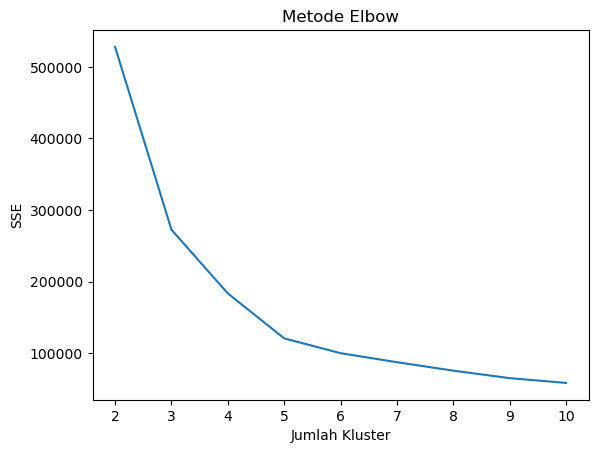

In [74]:
# Menentukan jumlah klaster yang mungkin
range_n_clusters = range(2,11)

# Menghitung SSE
sse = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_sc)
    sse.append(clusterer.inertia_)

# Menghitung nilai elbow
plt.plot(range_n_clusters, sse)

# Judul
plt.title('Metode Elbow')

# Penamaan x, dan y axis
plt.xlabel('Jumlah Kluster')
plt.ylabel('SSE')

# Menampilkan hasilnya
plt.show()

Sesuai dengan grafik tersebut, jumlah klasternya adalah 3.

In [75]:
# Menentukan algoritme model dengan jumlah klaster = 3
km_model = KMeans(n_clusters=3, random_state=0)

# Melatih model
km_model.fit(X_sc)

# Melakukan prediksi klaster pelanggan
predicted_clusters = km_model.predict(X_sc)

In [76]:
# Menyimpan label klaster ke kolom dataset
df_new['cluster_km'] = predicted_clusters

In [77]:
# Melihat perubahan dataset
percentage = 100 - ((df_new.shape[0]/541909)*100)
print('Ukuran dataset awal (541909, 7)')
print('Ukuran dataset akhir {}'.format(df_new.shape))
print('Persentase perubahan {:.2f}%'.format(percentage))

Ukuran dataset awal (541909, 7)
Ukuran dataset akhir (465470, 9)
Persentase perubahan 14.11%


**Kesimpulan sementara**:

1. Nama-nama kolom sudah dirubah menjadi *snake_case*.
2. Nilai duplikat sudah diperbaiki dengan menghapus nilai tersebut.
3. Nilai yang hilang pada kolom `description` dihapus, untuk kolom `customer_id` diisi dengan nilai modus berdasarkan kolom lainnya, dan sisa nilai yang hilang dari kolom `customer_id` dihapus.
4. Tipe data kolom `invoice_date` dan `customer_id` juga sudah dirubah untuk memudahkan analisa.
5. Setelah memeriksa nilai dari semua kolom, pada kolom:
   - `stock_code`, beberapa nilai dihapus karena tidak relevan.
   - `description`, dilakukan perubahan pada nilai yang ada di kolom dan menghapus data yang tidak relevan.
   - `quantity`,  perbaikan pada nilai negatif yang terdapat pada kolom ini dan merubahnya menjadi positif.
6. Outilier pada dataset sudah diperbaiki.
7. Menambahkan beberapa kolom untuk memudahkan analisa.

[Kembali ke tahapan](#back)

## *Exploratory Data Analysis*<a id='EDA'></a>

In [78]:
# Melihat dataset
df_new.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date,cluster_km
94493,544455,84597C,retro pink ball ashtray,12,2019-02-18 13:18:00,1.25,13097,2019-02-18,0
490338,578285,23581,jumbo bag paisley park,1,2019-11-21 13:57:00,2.08,12748,2019-11-21,1
288386,562393,23272,tree t-light holder willie winkie,24,2019-08-02 16:17:00,1.65,18172,2019-08-02,0
141228,548612,22083,paper chain kit retrospot,2,2019-03-30 11:34:00,2.95,13137,2019-03-30,1
265130,560293,21731,red toadstool led night light,1,2019-07-16 10:20:00,4.13,15311,2019-07-16,2


In [79]:
# Menambahkan kolom revenue
df_new ['revenue'] = df_new ['quantity'] * df_new ['unit_price']

### Metrik toko<a id='3_1'></a>

#### Tren pendapatan

In [80]:
# Menghitung total pendapatan 
daily_revenue = df_new.groupby('date').agg({
    'revenue': 'sum'
})

# Melihat hasilnya
daily_revenue

,revenue
date,
2018-11-29,28332.82
2018-11-30,24646.30
2018-12-01,20609.54
2018-12-03,21654.92
2018-12-04,33316.48
...,...
2019-12-03,47990.95
2019-12-04,30030.02
2019-12-05,29265.13


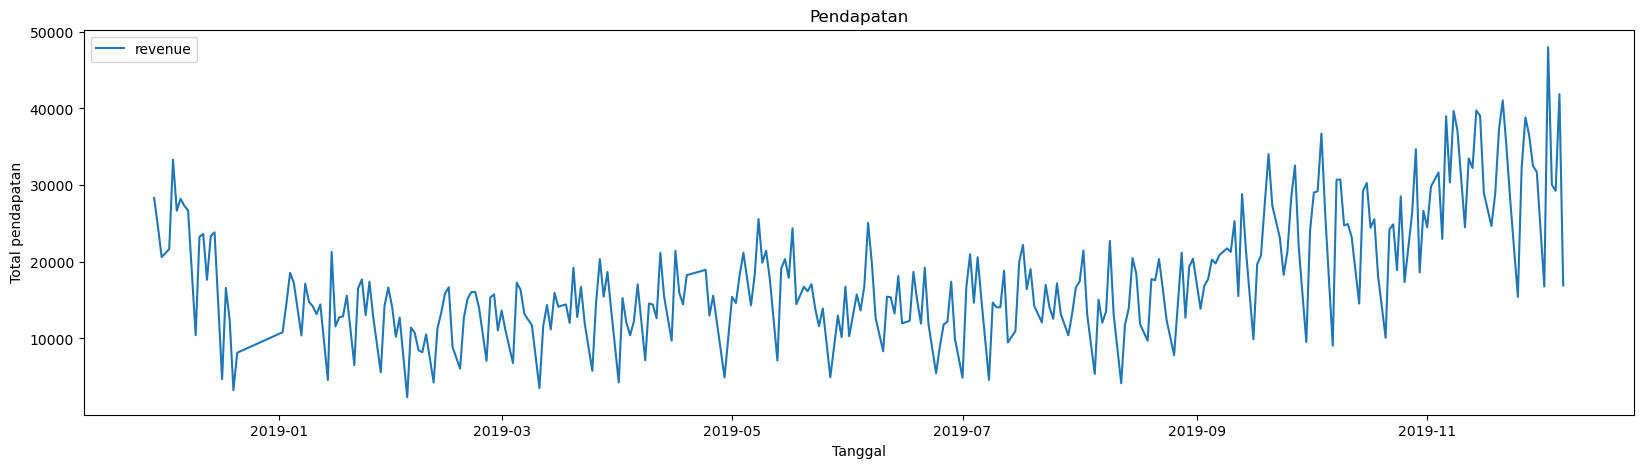

In [81]:
# Ukuran grafik
plt.figure(figsize=(20,5))

# Grafik
sns.lineplot(data=daily_revenue)

# Judul
plt.title('Pendapatan')

# Penamaan x, dan y axis
plt.xlabel('Tanggal')
plt.ylabel('Total pendapatan')

# Menampilkan hasilnya
plt.show()

Terlihat bahwa trennya naik pada pendapatan harian. Hal ini menunjukkan adanya peningkatan dalam jumlah pembelian yang dilakukan oleh pelanggan pada setiap harinya.

#### Rata-rata ukuran pembelian dan trennya

In [82]:
# Menghitung rata-rata ukuran pembelian per hari
daily_avg_order = df_new.groupby('date').agg({
    'quantity': 'mean',
})

# Melihat hasilnya
daily_avg_order

,quantity
date,
2018-11-29,5.127938
2018-11-30,7.267989
2018-12-01,5.060484
2018-12-03,4.564946
2018-12-04,4.319194
...,...
2019-12-03,5.359348
2019-12-04,5.936756
2019-12-05,8.242680


In [83]:
# Deskripsi statistik dataset
daily_avg_order.describe()

,quantity
count,305.000000
mean,6.324824
std,1.268461
min,2.955709
25%,5.383143
50%,6.265217
75%,7.176740
max,10.153631


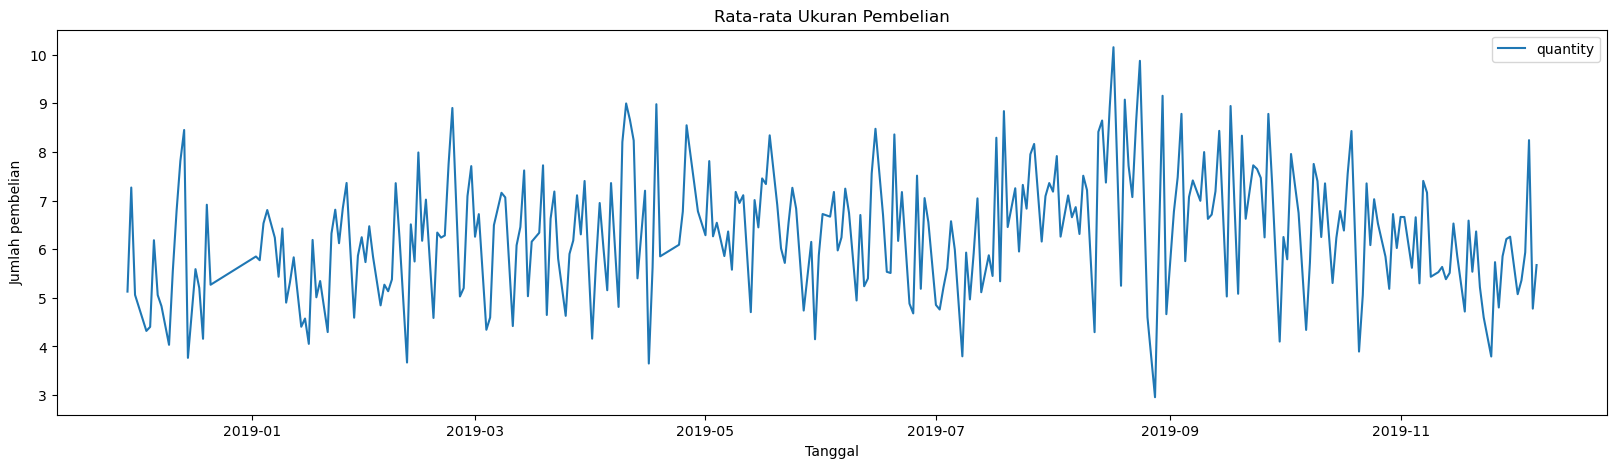

In [84]:
# Grafik
daily_avg_order.plot(kind='line', figsize=(20,5))

# Judul
plt.title('Rata-rata Ukuran Pembelian')

# Penamaan x, dan y axis
plt.xlabel('Tanggal')
plt.ylabel('Jumlah pembelian')

# Menampilkan hasilnya
plt.show()

Rata-rata ukuran pembelian pada periode waktu tertentu adalah sebesar 6.32, dengan pembelian maksimum mencapai 10.15 dan pembelian rata-rata sebesar 2.96. Tren dari grafik menunjukkan bahwa tidak ada lonjakan yang signifikan dalam ukuran pembelian dan trennya cenderung stabil.

#### Tren dari bulan ke bulan pada rata-rata pendapatan per pengguna

In [85]:
# Mendapatkan bulan dari tanggal
df_new['month'] = df_new['invoice_date'].dt.to_period('M')

In [86]:
# Pendapatan pengguna
rev_per_user = df_new.groupby(['customer_id','month']).agg({
    'revenue':'sum'
})

# Melihat hasilnya
rev_per_user

revenue
customer_id month           
12347       2018-12   697.28
            2019-01   671.83
            2019-02    41.45
            2019-03    77.56
            2019-04   415.23
...                      ...
18283       2019-10    88.54
            2019-11   721.94
            2019-12   216.26
18287       2019-05   440.28
            2019-10   520.48

[15103 rows x 1 columns]

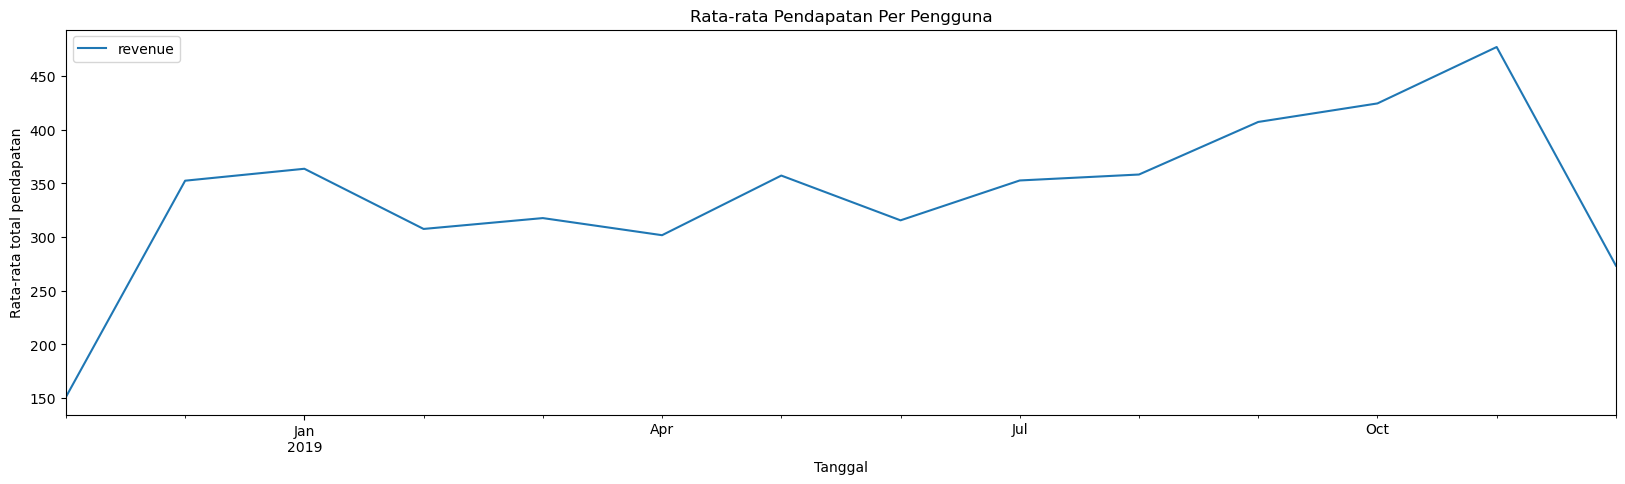

In [87]:
# Grafik
rev_per_user.groupby('month').mean().plot(kind='line', figsize=(20,5))

# Judul
plt.title('Rata-rata Pendapatan Per Pengguna')

# Penamaan x, y axis
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata total pendapatan')

# Melihat hasilnya
plt.show()

Terlihat bahwa terjadi tren kenaikan pada rata-rata pendapatan per pengguna dari bulan ke bulan. Hal ini menunjukkan adanya peningkatan aktivitas pembelian yang dilakukan oleh para pengguna pada setiap bulannya.

**Kesimpulan sementara**
1. Terlihat adanya tren yang positif pada pendapatan harian dan rata-rata pendapatan per pengguna dari bulan ke bulan. Hal ini menunjukkan peningkatan aktivitas pembelian yang dilakukan oleh pelanggan dan pengguna.
2. Meskipun demikian, ukuran pembelian cenderung stabil dan tidak menunjukkan lonjakan signifikan. Oleh karena itu, perlu dilakukan analisis lebih lanjut untuk mengidentifikasi faktor apa yang dapat mempengaruhi ukuran pembelian dan memperkuat tren positif pada pendapatan.

[Kembali ke tahapan](#back)

### Segmen pengguna<a id='3_2'></a>

#### Klaster

In [88]:
# Mendapatkan statistik nilai fitur rata-rata per klaster
df_new.groupby(['cluster_km']).mean()

,quantity,unit_price,revenue
cluster_km,,,
0,15.149812,1.363648,19.754185
1,2.953653,1.811960,5.419509
2,2.882867,5.327696,15.118427


***Findings***:
1. Klaster 0 memiliki jumlah pesanan tertinggi, nilai unit_price paling rendah, dan memiliki nilai total yang paling tinggi,
2. Sedangkan klaster 1 memiliki jumlah pesanan yang paling rendah, nilai unit_price tertinggi, dan nilai total yang lebih rendah dari klaster 0.
3. Klaster 2 memiliki jumlah pesanan lebih rendah dari klaster 0, nilai unit_price lebih rendah dari klaster 1, dan memiliki nilai total terendah diantara seluruh klaster.

***Insight***:
1. Klaster 0 dapat cenderung mewakili pelanggan yang melakukan pembelian produk dalam jumlah besar dengan harga yang lebih murah dan menciptakan nilai revenue yang lebih tinggi,
2. Sedangkan klaster 1 dapat cenderung mewakili pelanggan yang melakukan pembelian dalam jumlah kecil namun dengan harga yang lebih mahal,
3. Klaster 2 cenderung mewakili pelanggan yang melakukan pembelian dalam jumlah kecil dengan harga yang lebih murah dan menciptakan nilai revenue yang lebih rendah.

#### Kohort

In [89]:
# Fungsi untuk menghitung rata-rata pendapatan per pengguna
'''
Definisi:
-----------
    Fungsi untuk menghitung rata-rata pendapatan per pengguna
-----------
    data:
        data yang diinginkan
'''
def avg_revenue_user (data):
    # Memfilter kolom yang dibutuhkan
    orders = data[['invoice_date', 'customer_id', 'revenue']]
    
    # Melihat hari pertama pesanan
    first_order_date = orders.groupby('customer_id').agg({
        'invoice_date':'min'
    })

    # Merubah nama kolom
    first_order_date = first_order_date.rename(columns=({
        'invoice_date' : 'first_invoice_date'
    }))
    
    # Menggabungkan dataset
    orders = orders.join(first_order_date, on='customer_id')
    
    # Medapatkan bulan dari kolom `invoice_date`
    orders['invoice_month'] = orders['invoice_date'].astype('datetime64[M]')

    # Medapatkan bulan dari kolom `first_invoice_date`
    orders['first_invoice_month'] = orders['first_invoice_date'].astype('datetime64[M]')
    
    # Agregasi pendapatan per pengguna
    orders_grouped_by_cohorts = orders.groupby(['first_invoice_month', 'invoice_month']).agg({
        'revenue': 'sum',
        'customer_id': 'nunique'
    }).reset_index()
    
    # Menghitung pendapatan rata-rata per pengguna
    orders_grouped_by_cohorts['revenue_per_user'] = (
        orders_grouped_by_cohorts['revenue']
        / orders_grouped_by_cohorts['customer_id']
    )
    
    # Menghitung siklus hidup pengguna
    orders_grouped_by_cohorts['cohort_lifetime'] = (
        orders_grouped_by_cohorts['invoice_month']
        - orders_grouped_by_cohorts['first_invoice_month']
    )
    
    # Merubah hari ke bulan
    orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts[
        'cohort_lifetime'
    ] / np.timedelta64(1, 'M')
    
    # Membulatkan nilainya
    orders_grouped_by_cohorts['cohort_lifetime'] = (
        orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
    )
    
    # Menyisakan tahun dan bulan
    orders_grouped_by_cohorts['first_invoice_month'] = orders_grouped_by_cohorts['first_invoice_month'].dt.strftime('%Y-%m')
    
    # Pivot table pendapatan rata-rata per pengguna
    revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
        index='first_invoice_month',
        columns='cohort_lifetime',
        values='revenue_per_user',
        aggfunc='mean',
    )
    
    # Ukuran grafik
    plt.figure(figsize=(13, 9))

    # Heatmap
    sns.heatmap(
        revenue_per_user_pivot,
        annot=True,
        fmt='.1f',
        linewidths=1,
        linecolor='gray',
    )

    # Judul
    plt.title('Pendapatan per pengguna')

    # Penaman x,y axis
    plt.xlabel('Siklus kohort')
    plt.ylabel('Kohort')

    return plt.show()


Klaster 0:


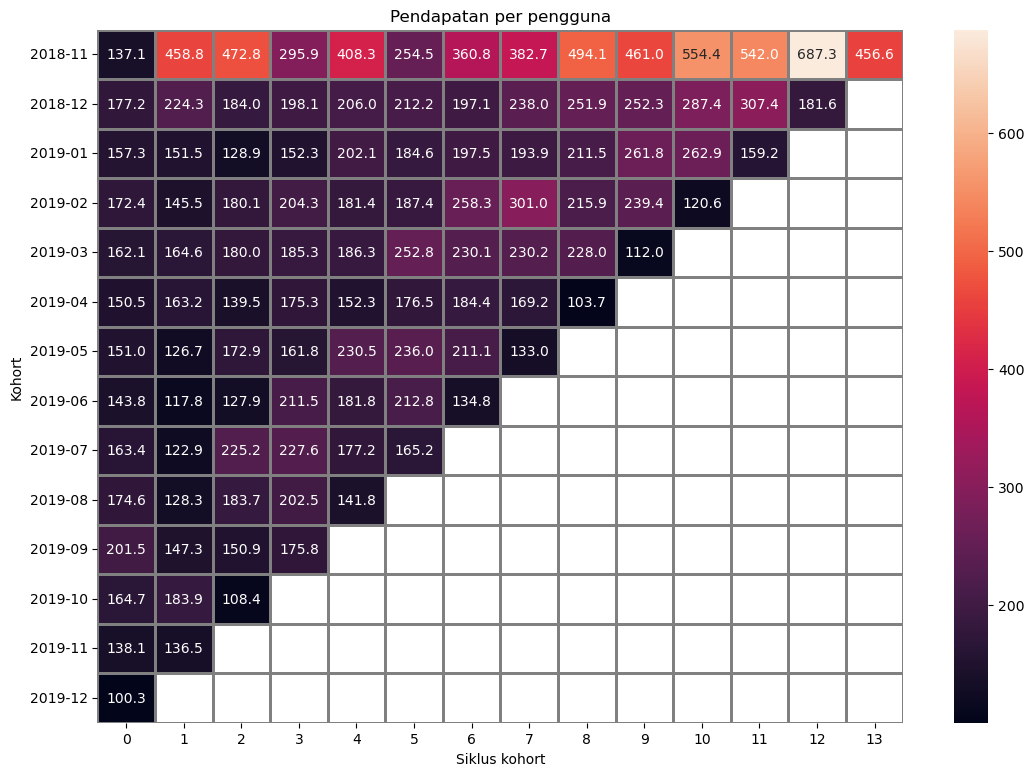


Klaster 1:


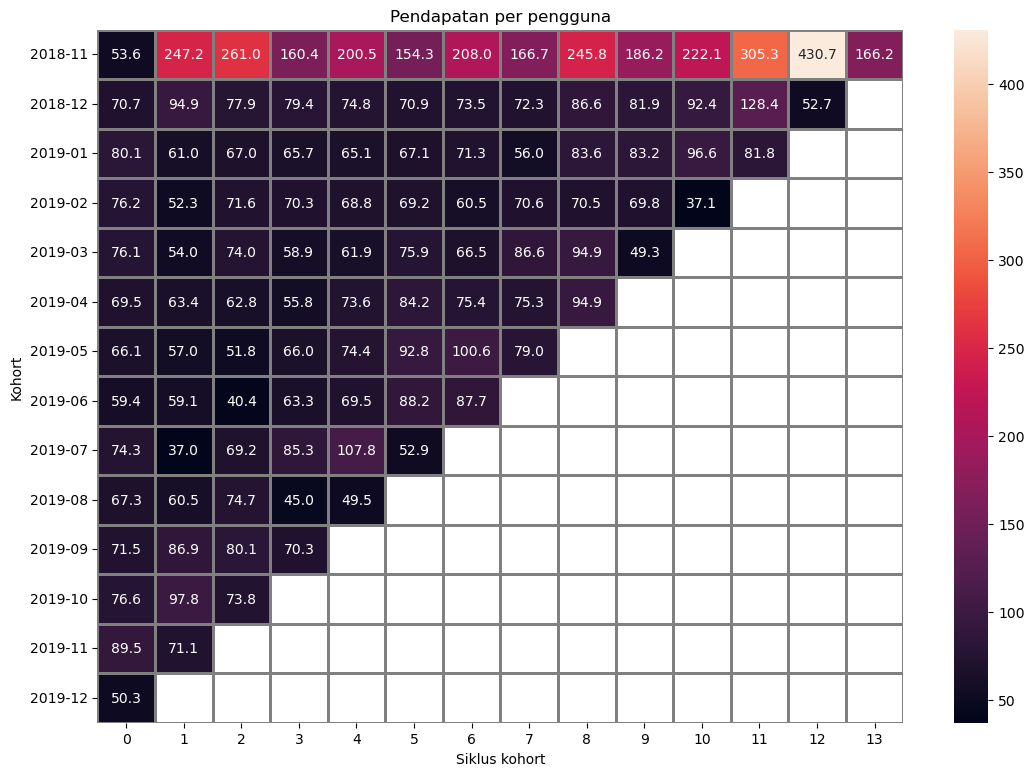


Klaster 2:


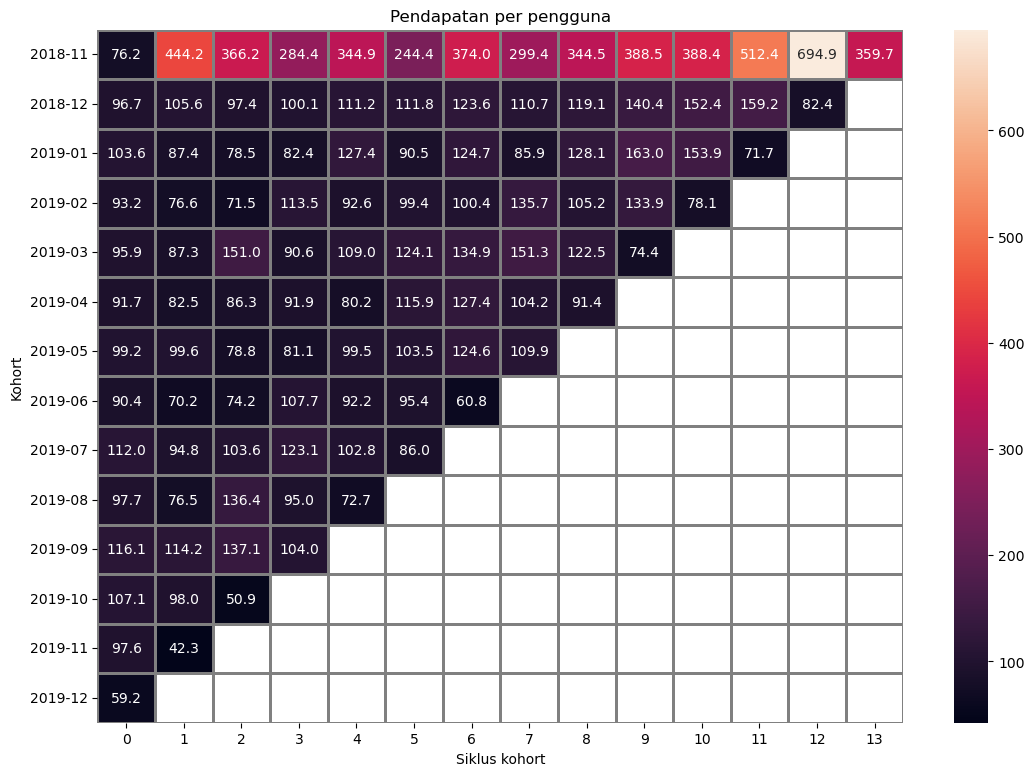

In [90]:
# Menampilkan rata-rata pendapatan perpengguna untuk masing-masing klaster
for i in range(3):
    print(f"\nKlaster {i}:")
    avg_revenue_user(data=df_new[df_new['cluster_km'] == i])

Jika dilihat dari kohort 2018-11 pada semua klaster pendapatan yang dihasilkan dari pengguna lebih tinggi dibandingkan kohort lainnya, ini menunjukkan periode pembelian musiman, puncaknya pada siklus hidup bulan ke 12 yang menunjukkan kemungkinan adanya pembelian berulang pada periode tersebut, walaupun jumlah pendapatannya berbeda namun semua klaster menunjukkan nilai maksimum pada kohort tersebut.

#### Preferensi produk dan ukuran pesanan

In [91]:
# Menghitung total pendapatan
product_preference = df_new.groupby(['cluster_km', 'description']).agg({
    'revenue':'sum',
    'quantity':'mean'
}).reset_index()

In [92]:
# Mengurutkan nilai
product_preference = product_preference.sort_values(['cluster_km', 'revenue'], ascending=[True, False])

In [93]:
# Menampilkan 10 produk teratas untuk masing-masing klaster
for i in range(3):
    
    # Judul
    print(f"\nKlaster {i}:")
    
    # Menampilkan hasilnya
    display(product_preference[product_preference['cluster_km']==i].head(5))


Klaster 0:


,cluster_km,description,revenue,quantity
1263,0,jumbo bag red retrospot,24743.26,12.187891
1402,0,lunch bag red retrospot,16791.71,11.858793
2689,0,white hanging heart t-light holder,16419.09,13.768657
147,0,assorted colour bird ornament,15816.47,18.147059
1233,0,jam making set printed,12448.41,13.696517



Klaster 1:


,cluster_km,description,revenue,quantity
5581,1,white hanging heart t-light holder,17022.55,4.262887
4404,1,natural slate heart chalkboard,10714.70,4.670951
2982,1,assorted colour bird ornament,9248.10,7.220386
5618,1,wooden frame antique white,8756.60,4.350365
4971,1,roses regency teacup and saucer,8623.70,4.559190



Klaster 2:


,cluster_km,description,revenue,quantity
6774,2,party bunting,30568.54,4.908730
7254,2,spotty bunting,21153.90,4.383590
6138,2,doormat keep calm and come in,21126.91,4.535885
7099,2,set of 3 cake tins pantry design,17947.45,3.083263
6477,2,jam making set with jars,17923.52,3.873856


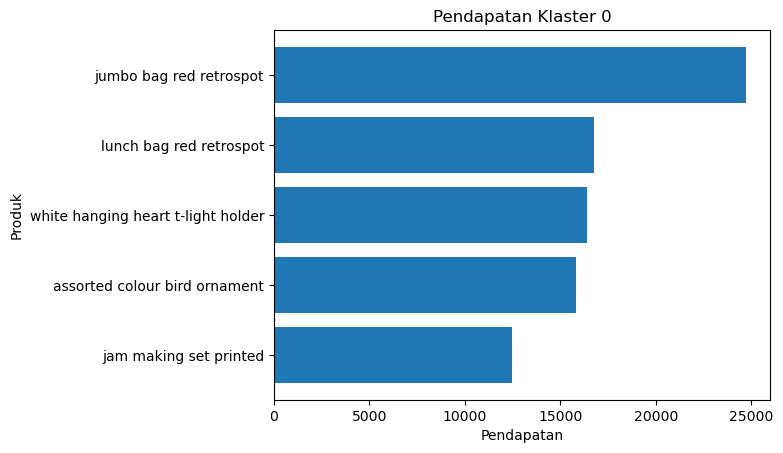

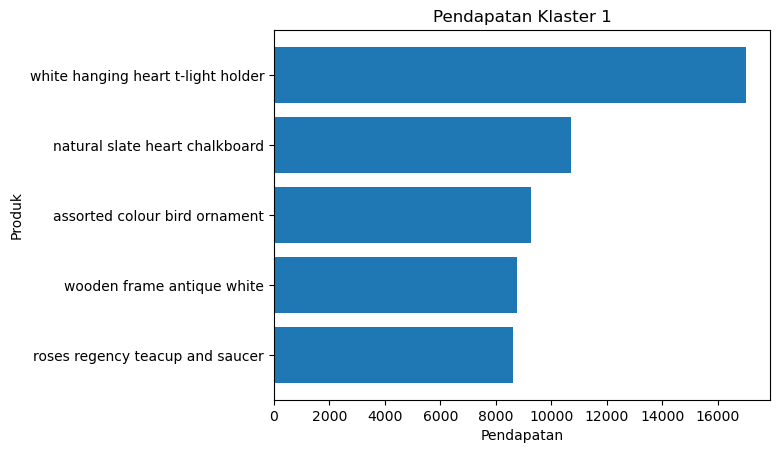

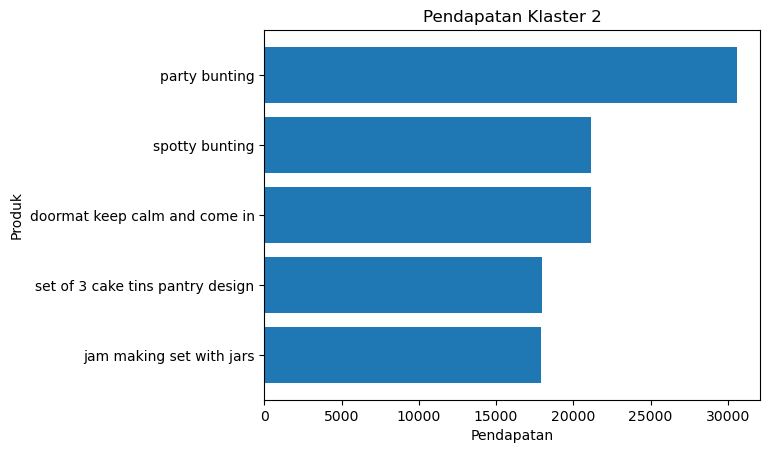

In [94]:
# Membuat histogram untuk setiap klaster
for i in range(3):
    
    # Membuat subplot
    fig, ax = plt.subplots()
    
    # Memanggil fungsi untuk membalik urutan sumbu y
    ax.invert_yaxis()
    
    # Filter dataset
    products = product_preference[product_preference['cluster_km'] == i].head(5)
    
    # Histogram
    ax.barh(products['description'], products['revenue'])
    
    # Judul
    plt.title(f"Pendapatan Klaster {i}")
    
    # Penamaan x, y axis
    plt.xlabel("Pendapatan")
    plt.ylabel("Produk")
    
    # Menampilkan hasilnya
    plt.show()

***Findings***:
1. Pendapatan klaster 0 terbanyak berasal dari bag red retrospot, diikuti light holder, bird ornament, dan jam making set secara berurutan
2. Sedangkan klaster 1 pendapatan terbanyak berasal dari bunting diikuti doormat, cake tins, dan jam making set secara berurutan.
3. Untuk klaster 2 pendapatan terbanyak berasal dari light holder, chalkboard, bird ornament, wooden frame antique, dan teacup and saucer.

**Insight**:
1. Klaster 0 memiliki preferensi terhadap produk-produk yang berupa dekorasi rumah seperti bag red retrospot, light holder, bird ornament, dan jam making set.
2. Klaster 1 memiliki preferensi terhadap produk-produk yang berkaitan dengan dekorasi rumah seperti bunting dan doormat, serta produk-produk yang berkaitan dengan alat memasak seperti cake tins dan jam making set.
3. Klaster 2 memiliki preferensi terhadap produk-produk yang berkaitan dengan dekorasi rumah seperti light holder, chalkboard, dan wooden frame antique, serta produk-produk yang berkaitan dengan alat minum seperti teacup and saucer.

**Kesimpulan sementara**
1. Klaster 0 adalah segmen pelanggan dengan jumlah pesanan tertinggi, nilai unit_price paling rendah, dan nilai total yang paling tinggi. Preferensi produk di segmen ini termasuk jumbo bag red retrospot, lunch bag red retrospot, dan white hanging heart t-light holder.

2. Klaster 1 memiliki jumlah pesanan paling rendah, nilai unit_price tertinggi, dan nilai total yang lebih rendah dari klaster 0. Preferensi produk di segmen ini termasuk party bunting, spotty bunting, dan doormat keep calm and come in.

3. Sedangkan Klaster 2 memiliki jumlah pesanan lebih rendah dari klaster 0, nilai unit_price lebih rendah dari klaster 1, dan memiliki nilai total terendah di antara ketiga segmen. Preferensi produk di segmen ini termasuk white hanging heart t-light holder, natural slate heart chalkboard, dan assorted colour bird ornament.

4. Selain itu, analisis juga menunjukkan ukuran pesanan yang berbeda di setiap segmen. Klaster 0 memiliki pesanan dengan jumlah terbesar, sedangkan klaster 1 memiliki pesanan dengan jumlah paling rendah. Klaster 2 memiliki jumlah pesanan yang lebih rendah dibandingkan dengan klaster 0 dan preferensi produk yang berbeda dari dua segmen lainnya.

5. Terakhir, ditemukan bahwa kohort November 2018 memiliki pendapatan terbanyak dari pengguna di semua klaster, menunjukkan adanya periode pembelian musiman dengan kemungkinan adanya pembelian berulang pada periode tersebut.


**Rekomendasi**

Dari sini, dapat diterapkan beberapa strategi pemasaran yang berbeda pada setiap cluster untuk meningkatkan penjualan, misalnya:
1. Pada klaster 0, strategi pemasaran dapat difokuskan pada penjualan produk dalam jumlah besar dan harga yang lebih murah untuk meningkatkan total transaksi.
2. Sedangkan pada klaster 1, mungkin lebih fokus pada penjualan produk dengan harga lebih tinggi namun dengan jumlah pembelian kecil.
3. Sedangkan pada klaster 2, strategi pemasaran dapat difokuskan pada produk dengan harga yang lebih murah dan pembelian dalam jumlah kecil untuk menarik pelanggan dalam jumlah yang lebih besar dan meningkatkan total transaksi.

[Kembali ke tahapan](#back)

## Menguji Hipotesis<a id='Test'></a>

Uji hipotesis kali ini akan menggunakan t-test dimana sampel untuk menguji perbedaan antara dua variabel.

T-test sendiri memiliki nilai *p-value* atau probabilitas kemunculan nilai dan juga *alpha* atau batas error yang digunakan.

Jadi, jika p-value lebih kecil dari alpha, maka kita bisa menyimpulkan bahwa bukti cukup kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1). Sedangkan, jika p-value lebih besar dari alpha, maka kita gagal menolak hipotesis nol (H0) dan belum bisa mengambil kesimpulan apapun tentang hipotesis alternatif (H1).

Untuk saat ini alpha yang digunakan adalah 5%.

### Perbedaan statistik ukuran pesanan klaster 0 dan 2<a id='h1'></a>

Sebelum memulai pengujian hipotesis, hipotesis nol (H0) dan hipotesis alternatif (H1) harus ditentukan terlebih dahulu.
1. H0 : Rata-rata ukuran pesanan klaster 0 dan klaster 2 adalah sama.
2. H1 : Rata-rata ukuran pesanan klaster 0 dan klaster 2 adalah tidak sama.

Jika H0 mendefinisikan rata-rata ukuran pesanan klaster 0 dan klaster 2 adalah 'sama', maka H1 akan mendefinisikan kebalikan dari H0 yaitu rata-rata ukuran pesanan klaster 0 dan klaster 2 adalah 'tidak sama'.

In [95]:
# Filter data
cluster_0 = df_new.loc[df_new['cluster_km'] == 0]
cluster_2 = df_new.loc[df_new['cluster_km'] == 2]

In [96]:
# Rata-rata ukuran pesanan pelanggan klaster 0
quantity_0 = cluster_0.groupby('customer_id').agg({
    'quantity':'mean'
}).reset_index()

# Rata-rata ukuran pesanan pelanggan klaster 2
quantity_2 = cluster_2.groupby('customer_id').agg({
    'quantity':'mean'
}).reset_index()

In [97]:
# Varians klaster 0
np.var(quantity_0['quantity'])

9.154385477780664

In [98]:
# Varians klaster 2
np.var(quantity_2['quantity'])

4.5750902456190135

In [99]:
# Alpha ditentukan 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(quantity_0['quantity'], quantity_2['quantity'], equal_var=False)

# Menampilkan hasilnya
print('p-value:', results.pvalue)

# Menampilkan hasilnya berdasarkan kondisi
if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak bisa mengabaikan hipotesis nol') 

p-value: 0.0
Kita menolak hipotesis nol


Seperti yang dijelaskan diatas, karena nilai p-value lebih kecil dari alpha maka hipotesis nol ditolak, yang berarti secara statistik rata-rata pendapatan pengguna klaster 0 dan klaster 2 berbeda.

[Kembali ke tahapan](#back)

## Kesimpulan Umum<a id='Kesimpulan'></a>

Setelah menganalisa data, melakukan perbaikan pada dataset, menambahkan kolom untuk mempermudah analisa, setelah itu melakukan analisa, dapat ditarik beberapa kesimpulan yang dapat digunakan untuk membuat tawaran khusus untuk pelanggan, antara lain:

1. Ditemukan adanya tren positif pada pendapatan harian dan rata-rata pendapatan per pengguna dari bulan ke bulan. Hal ini menunjukkan peningkatan aktivitas pembelian yang dilakukan oleh pelanggan dan pengguna. Oleh karena itu, disarankan untuk memanfaatkan tren ini dengan membuat tawaran khusus atau promo untuk meningkatkan jumlah dan nilai transaksi.

2. Pada saat yang sama, ditemukan bahwa ukuran pembelian cenderung stabil dan tidak menunjukkan lonjakan signifikan. Oleh karena itu, disarankan untuk melakukan analisis lebih lanjut untuk mengidentifikasi faktor apa yang dapat mempengaruhi ukuran pembelian dan memperkuat tren positif pada pendapatan.

3. Terdapat periode pembelian musiman dengan kemungkinan adanya pembelian berulang pada periode tersebut. Oleh karena itu, disarankan untuk membuat tawaran khusus atau promo pada periode tersebut untuk meningkatkan penjualan.

4. Ditemukan adanya tiga segmen pelanggan yang berbeda dengan preferensi produk yang berbeda pula. Oleh karena itu, disarankan untuk melakukan segmentasi pelanggan dan membuat tawaran khusus untuk setiap segmen:
    - Klaster 0 adalah segmen pelanggan dengan jumlah pesanan tertinggi dan nilai total paling tinggi. Strategi pemasaran untuk segmen ini dapat difokuskan pada penjualan produk dalam jumlah besar dan harga yang lebih murah untuk meningkatkan total transaksi.

    - Klaster 1 memiliki jumlah pesanan paling rendah dan nilai total yang lebih rendah dari klaster 0. Strategi pemasaran untuk segmen ini mungkin lebih fokus pada penjualan produk dengan harga lebih tinggi namun dengan jumlah pembelian kecil.

    - Klaster 2 memiliki nilai total terendah di antara ketiga segmen dan preferensi produk yang berbeda dari dua segmen lainnya. Strategi pemasaran untuk segmen ini dapat difokuskan pada produk dengan harga yang lebih murah dan pembelian dalam jumlah kecil untuk menarik pelanggan dalam jumlah yang lebih besar dan meningkatkan total transaksi.

[Kembali ke tahapan](#back)

## Presentasi<a id='Presentasi'></a>

Silahkan klik link ini: [Presentasi](https://docs.google.com/presentation/d/1p5bMBoNl5ASlNmSSFrS5TJkX0wzTQ4LO2TefD3fPCFo/edit?usp=sharing)

## Dashboard<a id='Dashboard'></a>

Silahkan klik link ini: [Dashboard](https://public.tableau.com/views/CustomerSegments_16827495401170/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link)

[Kembali ke tahapan](#back)